In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Dropout, Flatten, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import TFNNModels as NNM

### Data Processing

In [2]:
df_good_inp = pd.read_csv('DataFiles/goodinp_0.6.csv')  # import data
df_good_target = pd.read_csv('DataFiles/goodtar_0.6.csv')  # import data

In [3]:
df_good_inp.head()

,VIX,VIY,VGX,VGY,OIX,OIY
0,0.948718,0.953576,0.000000,0.471215,1.000000,0.000000
1,0.473333,0.000000,0.785714,0.752358,0.000000,0.838095
2,0.000000,0.497027,1.000000,0.707911,0.929785,0.107943
3,0.767296,0.237470,1.000000,1.000000,0.000000,0.368359
4,0.000000,0.904818,0.609756,0.540712,0.204265,0.000000


In [4]:
df_good_target .head()

,VM1X,VM1Y,VM2X,VM2Y
0,0.712500,0.913178,0.102703,1.000000
1,0.892045,0.331683,0.886792,0.219355
2,0.293706,0.517241,0.983240,0.855856
3,0.958763,0.204017,1.000000,0.997552
4,1.000000,0.644556,0.805714,0.344101


In [5]:
df_good_inp.shape

(5001, 6)

In [6]:
# Train and Test input
splitX = round(.70*len(df_good_inp))
max = len(df_good_inp)

trainX = df_good_inp[0:splitX]
testX = df_good_inp[splitX+1:max]


In [7]:
# Train and Test target
splitY = round(.70*len(df_good_target))
max = len(df_good_target)

trainY = df_good_target[0:splitY]
testY = df_good_target[splitY+1:max]

In [8]:
trainX = np.asarray(trainX)
trainX.shape

(3501, 6)

In [9]:
testX = np.asarray(testX)
testX.shape

(1499, 6)

In [10]:
sample_size = trainX.shape[0] # number of samples in train set
time_steps  = trainX.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = trainX.reshape(sample_size,time_steps,input_dimension)

In [11]:
test_data_reshaped = testX.reshape(testX.shape[0],testX.shape[1],1)

In [38]:
# train target
train_target1 = np.asarray(trainY['VM1X'])
test_target1 = np.asarray(testY['VM1X'])

In [18]:
#trainY = to_categorical(trainY)
#testY = to_categorical(testY)

In [19]:
kernel_size = 2
n_timesteps = train_data_reshaped.shape[1] #13
n_features  = train_data_reshaped.shape[2] #1 

In [15]:
train_data_reshaped.shape

(3501, 6, 1)

In [16]:
train_target1.shape

(3501,)

### CNN Model

In [21]:
NNM = NNM.TFNNModels()
model_conv1D_tar1 = NNM.build_conv1D_model(n_timesteps,n_features,kernel_size)

Created NN Model Instance


In [22]:
model_conv1D_tar1.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 5, 64)             192       
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 3, 32)             6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 2, 16)             1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 1, 16)            0         
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [49]:
# Store training stats
history = model_conv1D_tar1.fit(train_data_reshaped, train_target1, epochs=100,
                    validation_split=0.2, verbose=1)

Epoch 1/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0765 - mae: 0.2255 - val_loss: 0.1083 - val_mae: 0.2733
Epoch 2/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0759 - mae: 0.2237 - val_loss: 0.1109 - val_mae: 0.2775
Epoch 3/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0770 - mae: 0.2258 - val_loss: 0.1091 - val_mae: 0.2714
Epoch 4/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0760 - mae: 0.2244 - val_loss: 0.1075 - val_mae: 0.2694
Epoch 5/100
88/88 [==============================] - 1s 6ms/step - loss: 0.0774 - mae: 0.2264 - val_loss: 0.1078 - val_mae: 0.2736
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0778 - mae: 0.2278 - val_loss: 0.1099 - val_mae: 0.2745
Epoch 7/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0777 - mae: 0.2273 - val_loss: 0.1125 - val_mae: 0.2810
Epoch 8/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0772 - m

In [44]:
test_predictions=model_conv1D_tar1.predict(test_data_reshaped)

47/47 [==============================] - 0s 3ms/step


In [41]:
test_predictions.shape

(1499, 1)

In [35]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([0, np.max(history.history['val_mae'])+ .30*np.max(history.history['val_mae'])])
  
def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")

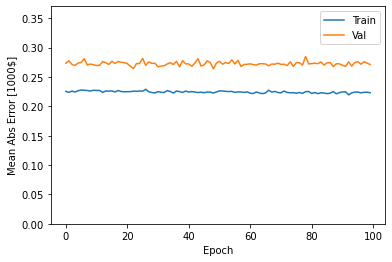

In [50]:
plot_history(history)

#### PLOTS

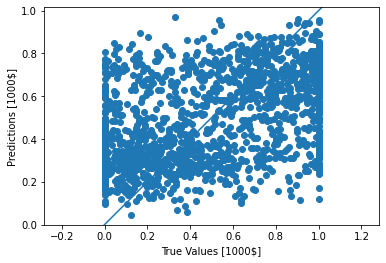

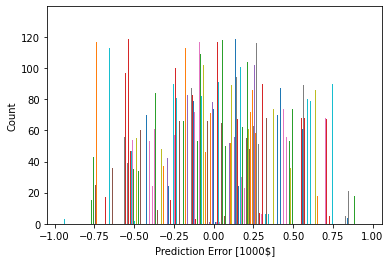

In [51]:
plot_prediction(test_target1,test_predictions)